In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Đọc file log thực tế
try:
    df = pd.read_csv('experiment_log.csv')
    print(f"✅ Đã đọc file log thành công! Tổng số dòng: {len(df)}")
except FileNotFoundError:
    print("❌ Lỗi: Không tìm thấy file 'experiment_log.csv'. Hãy chắc chắn bạn đã upload file.")

# 2. Tự động phân loại Hardware (CPU vs GPU)
# Logic: Thời gian chạy > 200 phút là CPU (vì GPU P100 chạy rất nhanh < 100 phút)
def detect_hardware(row):
    if row['total_time_min'] > 200: 
        return 'Local CPU'
    return 'Kaggle GPU'

if not df.empty:
    df['Hardware'] = df.apply(detect_hardware, axis=1)

    # 3. Tạo nhãn hiển thị (Label) đẹp mắt
    def get_label(row):
        if row['model_name'] == 'mobilenet_v2': return 'MobileNetV2'
        if row['technique'] == 'baseline': return 'ResNet Baseline'
        return f"ResNet Prune {int(row['pruning_amount']*100)}%"

    df['Label'] = df.apply(get_label, axis=1)

    # 4. Sắp xếp thứ tự hiển thị trên biểu đồ
    order_list = ['ResNet Baseline', 'ResNet Prune 30%', 'ResNet Prune 50%', 'ResNet Prune 70%', 'MobileNetV2']
    # Chỉ giữ lại các label có thật trong file để tránh lỗi
    existing_labels = [x for x in order_list if x in df['Label'].unique()]
    
    # Cấu hình giao diện chung
    sns.set_theme(style="whitegrid")
    palette_hw = {"Local CPU": "#FF9933", "Kaggle GPU": "#3399FF"} # Cam: CPU, Xanh: GPU

    print("📊 Dữ liệu đã sẵn sàng! Hãy chạy các Cell bên dưới để vẽ hình.")
    display(df[['timestamp', 'Label', 'Hardware', 'total_time_min', 'total_energy_kwh']])

✅ Đã đọc file log thành công! Tổng số dòng: 8
📊 Dữ liệu đã sẵn sàng! Hãy chạy các Cell bên dưới để vẽ hình.


,timestamp,Label,Hardware,total_time_min,total_energy_kwh
0,2025-12-20 20:47:22,ResNet Baseline,Local CPU,2641.57,5.723379
1,2025-12-22 15:52:50,ResNet Prune 30%,Local CPU,2634.08,5.707134
2,2025-12-23 11:38:58,MobileNetV2,Local CPU,667.57,1.447343
3,2025-12-25 16:09:11,ResNet Baseline,Kaggle GPU,74.55,0.077634
4,2025-12-25 17:23:59,ResNet Prune 30%,Kaggle GPU,74.52,0.077607
5,2025-12-25 18:38:47,ResNet Prune 50%,Kaggle GPU,74.51,0.077600
6,2025-12-25 19:53:50,ResNet Prune 70%,Kaggle GPU,74.77,0.077867
7,2025-12-25 20:14:14,MobileNetV2,Kaggle GPU,18.84,0.019623


C:\Users\longh\AppData\Local\Temp\ipykernel_17040\1791140181.py:22: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\longh\OneDrive\Attachments\Project\Project 1\Green-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


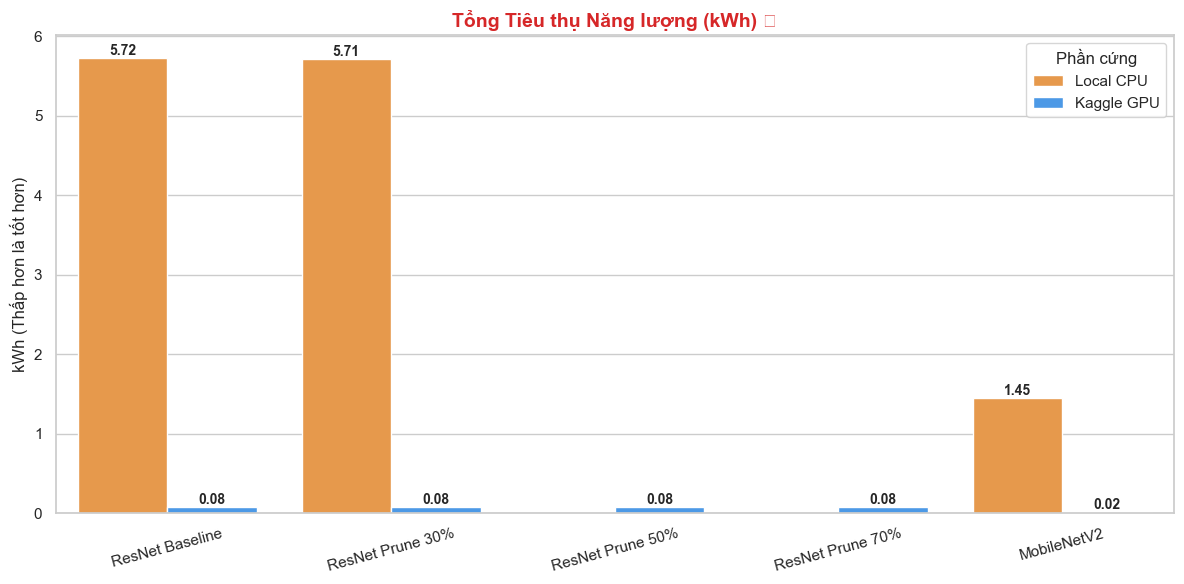

In [ ]:
if not df.empty:
    plt.figure(figsize=(12, 6))
    
    # Vẽ biểu đồ
    ax = sns.barplot(data=df, x='Label', y='total_energy_kwh', hue='Hardware', 
                     palette=palette_hw, order=existing_labels)

    # Trang trí
    plt.title('Tổng Tiêu thụ Năng lượng (kWh) ⚡', fontsize=14, fontweight='bold', color='#d62728')
    plt.ylabel('kWh (Thấp hơn là tốt hơn)')
    plt.xlabel('')
    plt.xticks(rotation=15)
    plt.legend(title='Phần cứng')

    # Ghi số liệu lên cột
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{h:.2f}', (p.get_x() + p.get_width() / 2., h),
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

C:\Users\longh\AppData\Local\Temp\ipykernel_17040\3628777446.py:23: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\longh\AppData\Local\Temp\ipykernel_17040\3628777446.py:23: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\longh\OneDrive\Attachments\Project\Project 1\Green-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\longh\OneDrive\Attachments\Project\Project 1\Green-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


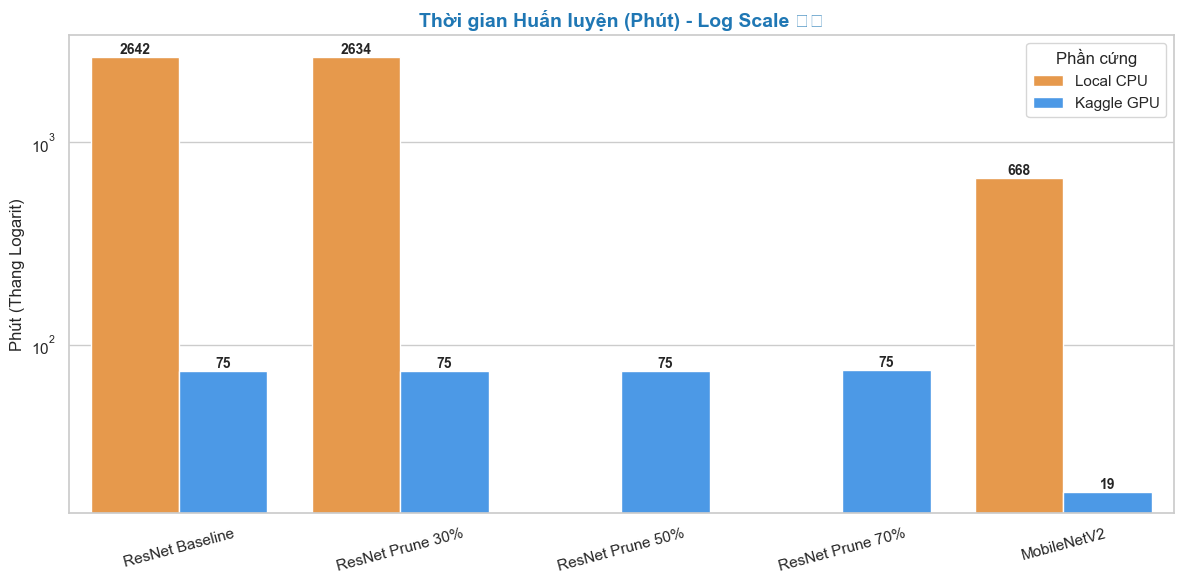

In [ ]:
if not df.empty:
    plt.figure(figsize=(12, 6))
    
    # Vẽ biểu đồ
    ax = sns.barplot(data=df, x='Label', y='total_time_min', hue='Hardware', 
                     palette=palette_hw, order=existing_labels)

    # Trang trí
    plt.title('Thời gian Huấn luyện (Phút) - Log Scale ⏱️', fontsize=14, fontweight='bold', color='#1f77b4')
    plt.ylabel('Phút (Thang Logarit)')
    plt.xlabel('')
    plt.yscale('log') # Quan trọng: Dùng thang log vì CPU quá chậm
    plt.xticks(rotation=15)
    plt.legend(title='Phần cứng')

    # Ghi số liệu
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{h:.0f}', (p.get_x() + p.get_width() / 2., h),
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

C:\Users\longh\AppData\Local\Temp\ipykernel_17040\3255391769.py:28: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\longh\OneDrive\Attachments\Project\Project 1\Green-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


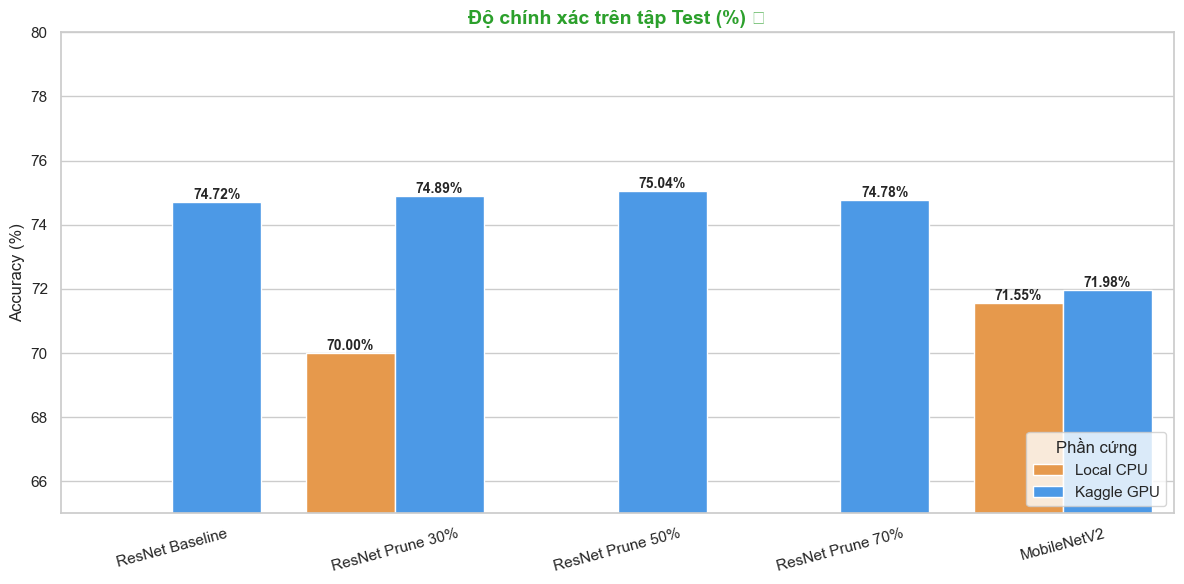

In [ ]:
if not df.empty:
    plt.figure(figsize=(12, 6))
    
    # Chuyển đổi sang %
    df['Acc_Percent'] = df['test_accuracy'] * 100

    # Vẽ biểu đồ
    ax = sns.barplot(data=df, x='Label', y='Acc_Percent', hue='Hardware', 
                     palette=palette_hw, order=existing_labels)

    # Trang trí
    plt.title('Độ chính xác trên tập Test (%) 🎯', fontsize=14, fontweight='bold', color='#2ca02c')
    plt.ylabel('Accuracy (%)')
    plt.xlabel('')
    
    # Zoom vào khoảng 65-80% để thấy chênh lệch nhỏ
    plt.ylim(65, 80) 
    plt.xticks(rotation=15)
    plt.legend(loc='lower right', title='Phần cứng')

    # Ghi số liệu
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{h:.2f}%', (p.get_x() + p.get_width() / 2., h),
                        ha='center', va='bottom', fontsize=10, fontweight='bold')

    plt.tight_layout()
    plt.show()

C:\Users\longh\AppData\Local\Temp\ipykernel_17040\4294342534.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=gpu_df, x='Label', y='Green_Score', palette=colors, order=existing_labels)
C:\Users\longh\AppData\Local\Temp\ipykernel_17040\4294342534.py:29: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\longh\OneDrive\Attachments\Project\Project 1\Green-AI\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


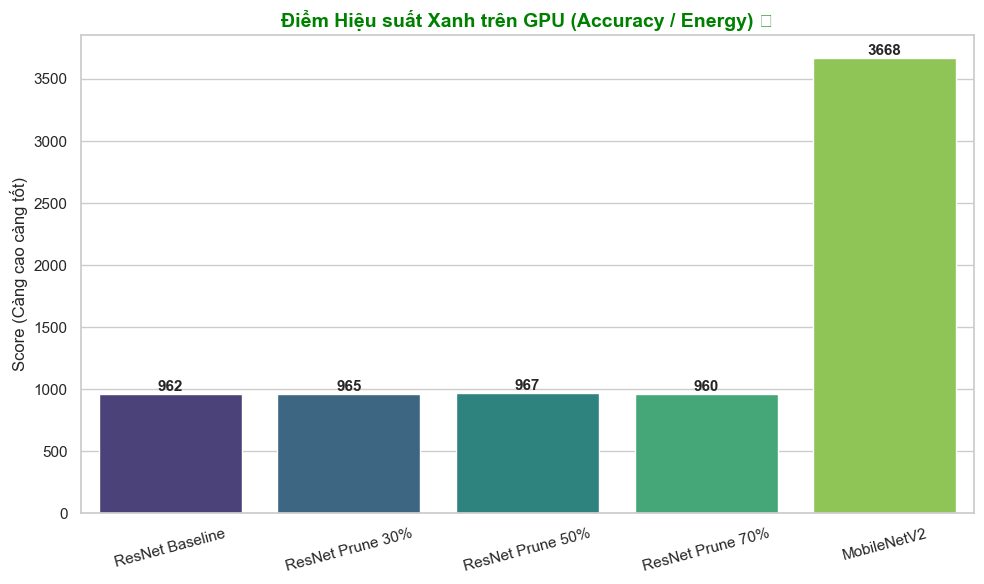

In [ ]:
# Chỉ lấy GPU để so sánh thuật toán (vì CPU điểm quá thấp vẽ vào sẽ bị bẹt)
gpu_df = df[df['Hardware'] == 'Kaggle GPU'].copy()

if not gpu_df.empty:
    plt.figure(figsize=(10, 6))
    
    # Tính điểm: Accuracy / Energy (Càng cao càng tốt)
    gpu_df['Green_Score'] = gpu_df['test_accuracy'] * 100 / gpu_df['total_energy_kwh']

    # Dùng bảng màu khác để phân biệt
    colors = sns.color_palette("viridis", len(gpu_df))
    
    # Vẽ biểu đồ
    ax = sns.barplot(data=gpu_df, x='Label', y='Green_Score', palette=colors, order=existing_labels)

    # Trang trí
    plt.title('Điểm Hiệu suất Xanh trên GPU (Accuracy / Energy) 🌿', fontsize=14, fontweight='bold', color='green')
    plt.ylabel('Score (Càng cao càng tốt)')
    plt.xlabel('')
    plt.xticks(rotation=15)

    # Ghi số liệu
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{h:.0f}', (p.get_x() + p.get_width() / 2., h),
                        ha='center', va='bottom', fontsize=11, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Chưa có dữ liệu GPU để vẽ biểu đồ này.")